## Q1 (kỹ thuật đọc và xử lý dữ liệu từ file .csv): Cho trước file dữ liệu advertising.csv, hãy hoàn thành function prepare_data(file_name_dataset) trả về dữ liệu đã được tổ chức (X cho input và y cho output).

In [1]:
import numpy as np
import matplotlib . pyplot as plt
import random
def get_column ( data , index ) :
# your code here ****************************
  result= [row[index] for row in data]
  return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Lấy dữ liệu TV (index = 0)
    tv_data = get_column(data, 0)

    # Lấy dữ liệu Radio (index = 1)
    radio_data = get_column(data, 1)

    # Lấy dữ liệu Newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # Lấy dữ liệu Sales (index = 3)
    sales_data = get_column(data, 3)

    # Xây dựng X input và y output cho training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

X , y = prepare_data ('/content/advertising.csv')
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( list )

[624.1, 175.10000000000002, 300.5, 78.9]


## Q2 (kỹ thuật huấn luyện data dùng one sample - linear regression): Sử dụng kết quả dữ liệu đầu vào X, và dữ liệu đầu ra y từ bài 1, để phát triển chương trình dự đoán thông tin sales (y) từ X bằng cách dùng giải thuật linear regression with one sample-training với loss được tính bằng công thức Mean Squared Error L = (ˆy − y)2. Sơ đồ hoạt động của giải thuật được mô tả ở hình 2. Nhiệm vụ củabạn là hoàn thành function implement_linear_regression(X_data, y_data, epoch_max, lr)và trả về 4 tham số w1, w2, w3, b và lịch sử tính loss như bên dưới.

In [3]:
import random

def initialize_params():
    # Khởi tạo tham số cố định
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    # Tính toán giá trị dự đoán
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_gradient_wi(xi, y, y_hat):
    # Tính gradient theo wi
    return 2 * (y_hat - y) * xi

def compute_gradient_b(y, y_hat):
    # Tính gradient theo b
    return 2 * (y_hat - y)

def update_weight_wi(wi, gradient, lr):
    # Cập nhật trọng số wi
    return wi - lr * gradient

def update_weight_b(b, gradient, lr):
    # Cập nhật bias b
    return b - lr * gradient

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    # Khởi tạo tham số
    w1, w2, w3, b = initialize_params()
    losses = []

    for epoch in range(epoch_max):
        for i in range(len(y_data)):
            x1, x2, x3 = X_data[0][i], X_data[1][i], X_data[2][i]
            y = y_data[i]

            # Dự đoán
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính toán loss
            loss = (y_hat - y) ** 2

            # Tính gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Cập nhật tham số
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Ghi lại loss
            losses.append(loss)

    return w1, w2, w3, b, losses

y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print(y)

1.0


##Q3: Hoàn thành function compute_loss(y_hat, y) để tính loss giữa kết quả dự đoán y_hat và giá trị thực y, sử dụng Mean Squared Error

In [4]:
def compute_loss(y_hat, y):
    # Tính toán loss sử dụng Mean Squared Error
    loss = (y_hat - y) ** 2
    return loss

# Ví dụ sử dụng
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


## Q4 + Q5:Hoàn thành function compute_gradient_wi(xi, y, y_hat)) để tính đạo hàm của hàm loss L = (ˆy − y)2 theo wi và function compute_gradient_b(y, y_hat) để tính đạo hàm của hàm loss L= (ˆy − y)2 theo b.

In [7]:
def compute_gradient_wi(xi, y, y_hat):
    # Tính gradient theo wi
    dl_dwi = 2 * (y_hat - y) * xi
    return dl_dwi
def compute_gradient_b(y, y_hat):
    # Tính gradient theo b
    dl_db = 2 * (y_hat - y)
    return dl_db

# MSE loss
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print(g_wi)

g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print(g_b)

-1.0
-3.0


## Q6 + Q7: Hoàn thành function update_weight_wi(wi, dl_dwi, lr) để cập nhật wi sau khi tính đạo làm hàm loss L theo wi, và function update_weight_b(b, dl_db, lr) để update bias (b) sau khi tính đạo làm hàm loss L theo b.

In [12]:
def update_weight_wi(wi, dl_dwi, lr):
    # Cập nhật trọng số wi
    wi = wi - lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    # Cập nhật bias b
    b = b - lr * dl_db
    return b

after_wi=update_weight_wi( wi =1.0 , dl_dwi = -0.5 , lr =1e-5)
print(after_wi)
after_b = update_weight_b( b =0.5 , dl_db = -1.0 , lr =1e-5)
print(after_b)
print(after_wi)

1.000005
0.50001
1.000005


## Q8: Thực hiện huấn luyện data bằng cách gọi hàm implement_linear_regression(X, y) và vẽđồ thị kết quả cho 100 giá trị loss đầu tiên (loss cho 100 lần cập nhật đầu tiên)

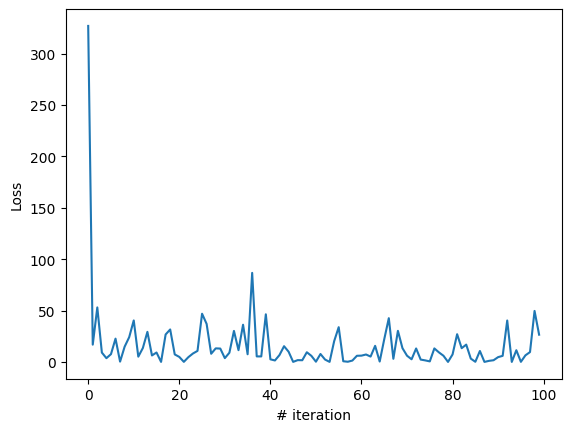

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# def prepare_data(file_path):
#     data = pd.read_csv(file_path)
#     X = data[['TV', 'Radio', 'Newspaper']].values.T
#     y = data['Sales'].values
#     return X, y
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Lấy dữ liệu TV (index = 0)
    tv_data = get_column(data, 0)

    # Lấy dữ liệu Radio (index = 1)
    radio_data = get_column(data, 1)

    # Lấy dữ liệu Newspaper (index = 2)
    newspaper_data = get_column(data, 2)

    # Lấy dữ liệu Sales (index = 3)
    sales_data = get_column(data, 3)

    # Xây dựng X input và y output cho training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    # Khởi tạo tham số
    w1, w2, w3, b = initialize_params()
    losses = []

    for epoch in range(epoch_max):
        for i in range(len(y_data)):
            x1, x2, x3 = X_data[0][i], X_data[1][i], X_data[2][i]
            y = y_data[i]

            # Dự đoán
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính toán loss
            loss = (y_hat - y) ** 2

            # Tính gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Cập nhật tham số
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Ghi lại loss
            losses.append(loss)

    return w1, w2, w3, b, losses

X , y = prepare_data ('/content/advertising.csv')

w1, w2, w3, b, losses = implement_linear_regression(X, y)

plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.show()

print(w1, w2, w3)

## Q9

In [24]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data('/content/advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f' predicted sales is { sales } ')

 predicted sales is 8.176413319549823 


## Q10: Thực hiện huấn luyện data bằng cách thay thế hàm loss L = (ˆy − y)2 bằng hàm loss MAE L =|yˆ − y| và vẽ đồ thị kết quả hàm loss trong 100 interation đầu tiên như bên hình 4.

In [26]:
def compute_loss_mae(y_hat, y):
    # Tính toán loss sử dụng Mean Squared Error
    loss = abs(y_hat - y)
    return loss

# Ví dụ sử dụng
l = compute_loss_mae(y_hat =1 , y =0.5)
print ( l )

0.5


## Q11 + Q12: (kỹ thuật huấn luyện data dùng batch N samples - linear regression): Cải tiến giải thuật ở bài tập 2, bằng cách huấn luyện giải thuật linear regression sử dụng N samples-training. Công việc của bạn ở bài tập này là bạn cần implement lại function implement_linear_regression_nsamples sử dụng N sample-training với MSE loss function và MAE loss function (optional)

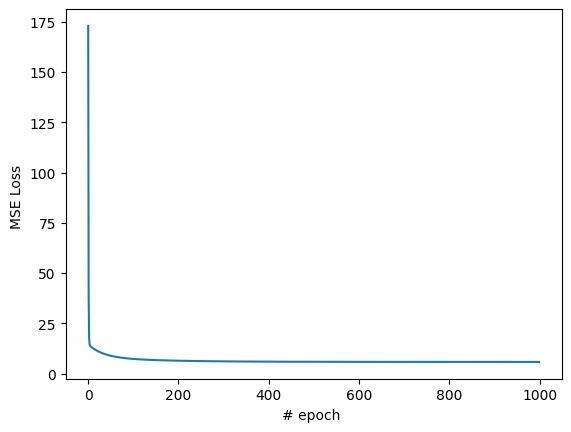

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [56]:
import numpy as np

def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    # Tính toán hàm dự đoán
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss_mse(y_hat, y):
    # Tính toán loss sử dụng Mean Squared Error
    loss_mse = (y_hat - y) ** 2
    # loss_mse = np.mean((y - y_hat) ** 2)
    return loss_mse
# def compute_loss_mae(y_hat, y):
#     # Tính toán loss sử dụng Mean Squared Error
#     loss_mae = abs(y_hat - y)
#     return loss_mae

# def compute_gradient_wi(x, y, y_hat):
#     return -2 * (y - y_hat) * x

# def compute_gradient_b(y, y_hat):
#     return -2 * (y - y_hat)

def compute_gradient_wi(xi, y, y_hat):
    # Tính gradient theo wi
    return 2 * (y_hat - y) * xi

def compute_gradient_b(y, y_hat):
    # Tính gradient theo b
    return 2 * (y_hat - y)

def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Lấy một mẫu
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # Tính toán đầu ra
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính toán loss
            loss_mse = compute_loss_mse(y, y_hat)

            # Cộng dồn loss
            loss_total += loss_mse

            # Tính gradient cho w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Cộng dồn gradient cho w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Cập nhật các tham số w1, w2, w3, b sau khi xử lý N mẫu
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N

        # Ghi lại loss
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

( w1,w2,w3,b,losses) = implement_linear_regression_nsamples (X , y ,epoch_max =1000 ,lr =1e-5)
# print(losses)
plt.plot (losses)
plt.xlabel ("# epoch ")
plt.ylabel ("MSE Loss ")
plt.show ()
X , y = prepare_data('/content/advertising.csv')
# using MSE loss
( w1,w2,w3,b,losses ) = implement_linear_regression_nsamples (X,y,epoch_max =1000 ,lr =1e-5)
print (w1,w2,w3)

# ( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X,y,epoch_max =1000 ,lr =1 e -5)
# print (losses)
# plt.plot ( losses )
# plt.xlabel ("# epoch ")
# plt.ylabel ("MAE Loss ")
# plt.show ()

## Q12

In [68]:
import numpy as np
import random
import matplotlib.pyplot as plt

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    def get_column(data, index):
        return [row[index] for row in data]

    # Lấy dữ liệu từ các cột
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    # Xây dựng X input và y output cho huấn luyện
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0, sigma=0.01)
    w2 = random.gauss(mu=0, sigma=0.01)
    w3 = random.gauss(mu=0, sigma=0.01)
    # Trả về danh sách chứa bias, w1, w2, w3
    # return [bias, w1, w2, w3]
    return [0 , -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

def predict(X_features, weights):
    # Tính toán dự đoán y = x0*b + x1*w1 + x2*w2 + x3*w3
    result = sum(x * w for x, w in zip(X_features, weights))
    return result

def compute_loss(y_hat, y):
    # Tính toán loss
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    # Tính toán gradient
    return [-2 * (y - y_hat) * x for x in X_features]

def update_weights(weights, gradients, lr):
    # Cập nhật trọng số với giá trị học lr
    return [w - lr * g for w, g in zip(weights, gradients)]

def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    weights = initialize_params()
    N = len(y_output)
    losses = []

    for epoch in range(epoch_max):
        print("Epoch", epoch)
        for i in range(N):
            # Lấy một mẫu - hàng i
            features_i = X_feature[i]
            y_true = y_output[i]

            # Tính toán đầu ra
            y_hat = predict(features_i, weights)

            # Tính toán loss
            loss = compute_loss(y_hat, y_true)

            # Tính toán gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y_true, y_hat)

            # Cập nhật parameters
            weights = update_weights(weights, dl_dweights, lr)

            # Ghi lại loss
            losses.append(loss)

    return weights, losses

# Sử dụng hàm huấn luyện
X, y = prepare_data('/content/advertising.csv')
# weights, losses = implement_linear_regression(X, y)

# print("Trọng số học được:", weights)

# Vẽ đồ thị loss theo số lần lặp (epoch)
# plt.plot(losses)
# plt.xlabel("Epoch")
# plt.ylabel("MSE Loss")
# plt.title("MSE Loss over Epochs")
# plt.show()
W , L = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
# Print loss value at iteration 9999
print (L[9999])

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
31.339223408109948
